The ACT-R model of long-term memory is based on simple assuptions:



1.   A memory is a collection of identical _traces_, each representing a single encoding of the same information
2.  A trace is characterized by an encoding time $t_i$ and a characteristic decay rate $d_i$.
3. At any point in time, the _odds_ of retrieving a trace are a power function of time since encoding: $(t-t_i)^{-d_i}$
4. The specific decay rate of trace $d_i$ of a trace is a function of the residual memory activation at the time of encoding: $d_i = \phi + c \times e^{-A(m,t_i)}$. ($\phi$ is the speed of forgetting, and $c$ is a constant set to 0.5)
5. The activation of a memory $A(t, m)$ is the log sum of the trace odds, $A(m, t) = \log \sum_i (t-t_i)^{-d_i}$
6. The retrieval probability of a memory, $P_m(t)$, is related to its activation: $P_m(t) = 1/(1+e^{-A(m,t)})$



In [ ]:

import numpy as np
import matplotlib.pyplot as plt


class Trace:
  "A memory trace"
  def __init__(self, ti, di):
    self.ti = ti
    self.di = di

  def odds(self, r_time):
    "Returns the odds of retrieving a trace"
    if (r_time > self.ti):
      return (r_time - self.ti) ** -self.di
    else:
      return 0


class Memory:
  "A memory is a collection of traces"
  def __init__(self):
    self.traces = []
    self.sof = 0.3
    self.c = 0.5


  def add_trace(self, ti):
    "Adds a new trace (created at time ti) to the memory.
    if len(self.traces) == 0:
      new_di = self.sof
    else:
      new_di = self.create_di(ti)

    new_trace = Trace(ti, new_di)
    self.traces.append(new_trace)


  def create_di(self, ti):
    "Creates the new decay rate for a new trace"
    activation = self.activation(ti)
    activation_term = np.exp(-activation)
    return self.sof + self.c * activation_term

  def activation(self, r_time):
    sum_odds = 0.0
    for trace in self.traces:
      sum_odds += trace.odds(r_time)

    if sum_odds <= 0:
      return 0
    else:
      return np.log(sum_odds)


  def prob_retrieval(self, r_time):
    activation = self.activation(r_time)
    return 1 / (1 + np.exp(-activation))




Given the history of a memory (i.e., its traces), the model makes precise predictions for the activation of the memory over time:

Text(0.5, 0, 'Time (s)')

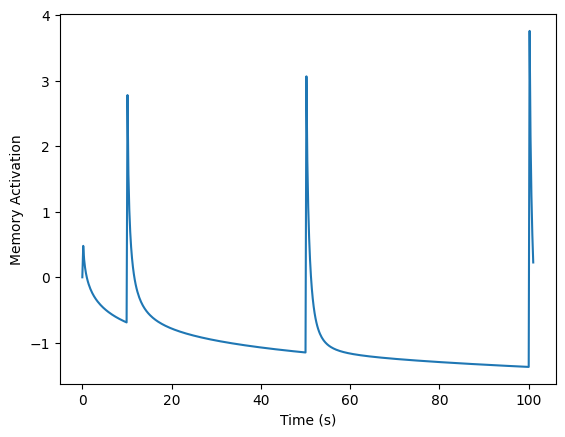

In [ ]:
test_time = [0, 10, 50, 100]

m = Memory()

for t in test_time:
  m.add_trace(t)

m.activation(200)


x = np.linspace(0, 101, 500)
y = [m.activation(t) for t in x]

plt.plot(x, y)
plt.ylabel("Memory Activation")
plt.xlabel("Time (s)")

And, of course, we can turn the predicted activations in predicted probabilities of retrieval:

Text(0.5, 0, 'Time (s)')

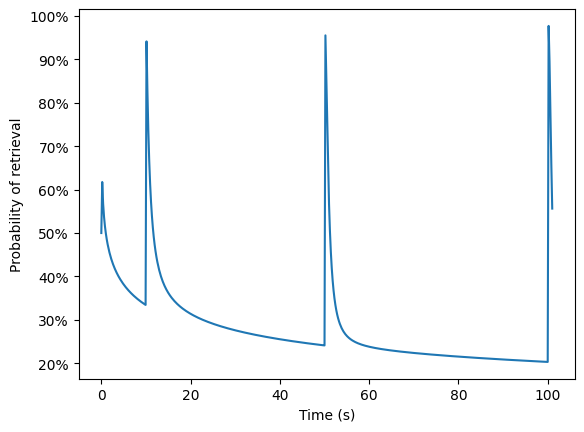

In [ ]:
y2 = [m.prob_retrieval(t) for t in x]

import matplotlib.ticker as mtick
plt.plot(x, y2)
plt.ylabel("Probability of retrieval")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
plt.xlabel("Time (s)")

Let's run a simple test and prediction with Ariel's data

In [ ]:
participant_sof = 0.31
ariel_times = [0, 2.503, 4.897, 8.005]
test_time = 83990.467

ariel_memory = Memory()
ariel_memory.sof = participant_sof

for x in ariel_times:
  ariel_memory.add_trace(x)

p = ariel_memory.prob_retrieval(test_time)
print("Retrieval probability is %.2f percent" % (p*100))

Retrieval probability is 2.92 percent
